In [111]:
# Impor modul yang dibutuhkan
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import nltk
nltk.download('punkt')

# Baca data dari file csv
df = pd.read_csv('data.csv')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:
import re
def casefolding(abstrak):
    abstrak = abstrak.lower()
    abstrak = abstrak.strip()
    abstrak = re.sub(r'[?|$|.|!_:")(-+]', '',abstrak)
    return abstrak
df["Abstrak"] = df["Abstrak"].apply(casefolding)

In [113]:
def token(abstrak):
    nstr = abstrak.split(' ')
    dat = [] 
    for i, s in enumerate(nstr):
        if len(s) > 0:
            dat.append(i)
    new_nstr = list(filter(lambda x: x != '', [nstr[i] for i in dat]))
    return new_nstr

df["Abstrak"] = df["Abstrak"].apply(token)
df.head(2)

,Abstrak,Kategori
0,"[sistem, informasi, akademik, siakad, merupakan, sistem, informasi, yang, berfungsi, menangani, pengelolaan, dan, penyajian, data-data, akademik,, yang, oleh, pihak, fakultas, siakad, dianggap, sangat, penting, dalam, memberikan, pelayanan, mahasiswa, yang, membutuhkan, informasi, akademik, di, universitas, trunojoyo, telah, tersedia, siakad,, namun, masih, menggunakan, database, terpusat, sistem, seperti, ini, memberikan, kelebihan, yaitu, perawatannya, mudah, selain, itu, juga, membutuhkan, sedikit, biaya,, namun, sistem, tersebut, juga, berpotensi, mengahadapi, kendala-kendala, yaitu, dalam, proses, transaksi, data, karena, padatnya, jaringan, yang, menuju, database, siakad,, kelambatan, dalam, pemrosesan, respon, query, dikarenakan, data, yang, tersimpan, semakin, besar, dan, pemrosesan, semakin, kompleks,, dan, juga, memiliki, kelemahan, dalam, hal, ketersediaan, data, untuk, itu, ...]",RPL
1,"[berjalannya, koneksi, jaringan, komputer, dengan, lancar, dan, tanpa, gangguan, merupakan, harapan, seluruh, penggunanya,\nterutama, pihak, yang, bertanggung, jawab, pada, bidang, itu,, yakni, administrator, jaringan, namun, tidak, selamanya, koneksi\njaringan, dapat, berjalan, dengan, lancar, tanpa, adanya, gangguan, kenyataan, di, lapangan, terutama, pada, jaringan, komputer, skala\nbesar,, berpotensi, besar, terjadi, gangguan, atau, bahkan, kerusakan, koneksi, jaringan, komputer\nhal, ini, rata, -, rata, disebabkan, banyaknya, penggunaan, serta, padatnya, traffic, data, dalam, jaringan, komputer, itu, sendiri\noleh, karena, itu, untuk, menjaga, bahkan, meningkatkan, kualitas, layanan, koneksi, jaringan, maka, diperlukan, adanya, akses, kontrol\ndan, monitoring, pada, level, administrator, jaringan, secara, real-time, berbasis, mobile,, yang, dapat, mengatur, dan, mengetahui\ninformasi, tentang, koneksi, jaringan, ...]",RPL


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_clean = pd.read_csv("data_clean.csv", encoding="latin1")
#data_clean = data_clean.astype({'Kategori'  : 'category'})
#data_clean = data_clean.astype({'Abstrak'  : 'string'})
#text_tf

In [115]:
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
count_wm = countvectorizer.fit_transform(data_clean['Abstrak'])
tfidf_wm = tfidfvectorizer.fit_transform(data_clean['Abstrak'])

#retrieve the terms found in the corpora
#if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference

count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)


In [129]:
from sklearn.decomposition import PCA
pca_abstrak = PCA(n_components=2)
#principalComponents_abstrak = pca_abstrak.fit_transform(df_tfidfvect)
X_pca = pca_abstrak.fit_transform(df_tfidfvect)
X_pca

array([[-0.02172455, -0.107987  ],
       [-0.02575009, -0.02956821],
       [-0.02637503, -0.03288346],
       ...,
       [ 0.23149411,  0.04257089],
       [ 0.09866574,  0.00759836],
       [ 0.06383238,  0.00532462]])

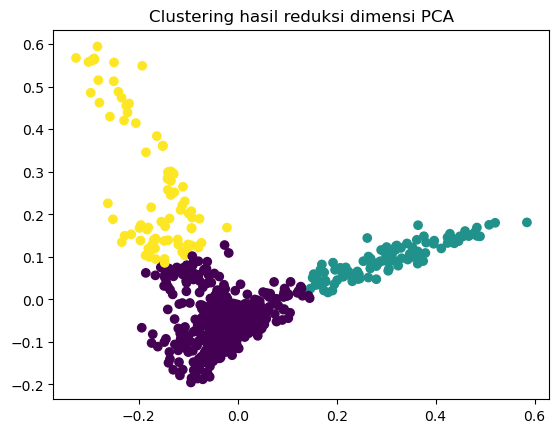

In [130]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering hasil reduksi dimensi PCA')
plt.show()